IMPORTING LIBRARIES

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from random import seed
from random import randrange #returns random numbers from a given range
from math import sqrt
from csv import reader
import seaborn as sns


READING DATASET

In [2]:
df = pd.read_excel("Social_Network_Ads.xlsx")
df["label"] = df.Purchased
df = df.drop("Purchased", axis=1)

column_names = []
for column in df.columns:
    name = column.replace(" ", "_")
    column_names.append(name)
df.columns = column_names

df.head()

,User_ID_,Gender_,Age_,EstimatedSalary_,label
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
dataset = pd.read_excel("Social_Network_Ads.xlsx")
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [4]:
print('dataset :',dataset.shape)
dataset.info()
dataset[0:10]

dataset : (400, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User ID           400 non-null    int64 
 1   Gender            400 non-null    object
 2   Age               400 non-null    int64 
 3   EstimatedSalary   400 non-null    int64 
 4   Purchased         400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


VISUALIZATION

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


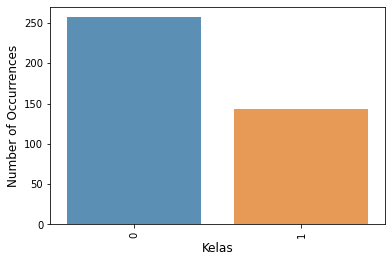

In [5]:
cnt_pro = dataset['Purchased'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Kelas', fontsize=12)
plt.xticks(rotation=90)
plt.show();

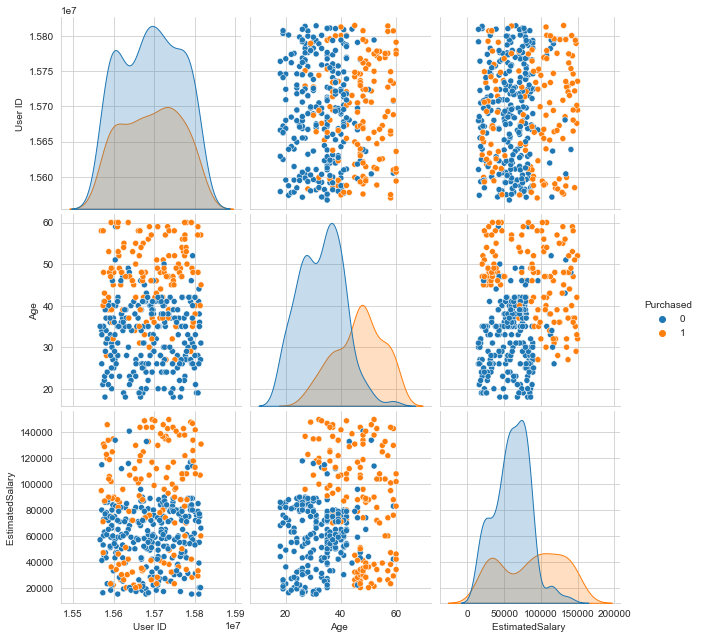

In [6]:
sns.set_style("whitegrid")
sns.pairplot(dataset,hue="Purchased",height=3);
plt.show()

<AxesSubplot:>

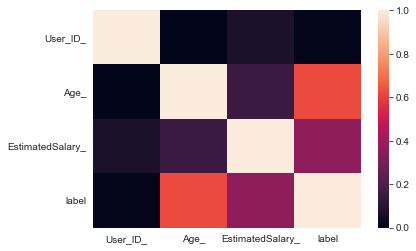

In [7]:
corr=df.corr()
sns.heatmap(corr)

In [8]:
def load_csv(filename, header):
    # Initialize the dataset as list
    dset = list()
    
    # Open the dataset as readable file
    with open(filename, 'r') as file:
        
        #intialize the csv reader
        csv_reader = reader(file)
        
        #Append each row
        for row in csv_reader:
            
            if not row or not header:
                header = 1
                continue
            
            dset.append(row)
    
    return dset

#Convert a string column(if present) to float
def str_col_to_float(dset, col):
    
    for row in dset:
        row[col] = float(row[col].strip())
        
# Create dummy values for a string column. Convert the string to integer
def str_col_to_int(dset, col):
    
    #Store all the values of the column in a list
    class_values = [row[col] for row in dset]
    
    #Store the unique values
    uniq = set(class_values)
    
    #Create a dictionary with the lookup
    lookup = dict()
    for i, val in enumerate(uniq):
        lookup[val] = i
    
    #Now using the lookup change the string values to integer
    for row in dset:
        row[col] = lookup[row[col]]
    return lookup  

# k-fold cross validation
def cross_validation_split(dset, k):
    
    fold_size = int(len(dset)/k) #Observations in each fold
    
    dset_cpy = list(dset) #Make a copy of the dataset
    
    dset_split = list() #Split dataset
    
    for i in range(k):
        
        fold = list()
        
        while len(fold) < fold_size:
            
            fold.append(dset_cpy.pop(randrange(len(dset_cpy))))
        
        dset_split.append(fold)
        
    return dset_split

# Split the dataset into two based on a value
def test_split(col, val, dset):
    
    left, right = list(), list()
    
    for row in dset:
        
        if row[col] < val:
            
            left.append(row)
            
        else:
            
            right.append(row)
            
    return left, right

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    
    correct = 0.0
    
    for i in range(len(actual)):
        
        if actual[i] == predicted[i]:
            correct += 1
    
    return correct/float(len(actual)) * 100.0

#Evaluate function
def eval_algorithm(dset, algorithm, k, *args):
    
    folds = cross_validation_split(dset, k)
    scores = list()
    
    for fold in folds:
        
        #Create a copy of the data
        train_set = list(folds)
        
        #Remove the subsample
        train_set.remove(fold)
        
        #Create only one list
        train_set = sum(train_set, [])
        
        #Create test list
        test_set = list()
        for row in fold:
            
            row_cpy = list(row)
            test_set.append(row_cpy)
            row_cpy[-1] = None #Since the last column contains the dependent variable
            
        #Predicted values
        pred = algorithm(train_set, test_set, *args)

        #Actual Values
        actual = [row[-1] for row in fold]
        
        #Accuracy
        accuracy = accuracy_metric(actual, pred)
        
        #Append to score list
        scores.append(accuracy)
        
    return scores

# Calculate Gini Index
def gini_index(groups, class_values):
    
    size0 = float(len(groups[0]))
    size1 = float(len(groups[1]))
    gini = 0
    
    for group in groups:
        
        if len(group) == 0:
            continue
            
        gini_group = 0
        
        for class_val in class_values:
            
            proportion = [row[-1] for row in group].count(class_val) / float(len(group))
            gini_group += (proportion*(1.0 - proportion))
            
#         gini += gini_group * len(group) / (size0 + size1)
        gini += gini_group 
    
    return gini

# Get split. To get the best feature - split threshold combination. This is a greedy algorithm
def get_split(dset, n_features):
    
    class_values = list(set([row[-1] for row in dset]))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    
    # Sample of all features for random forest
    feat_sub = list()
    while len(feat_sub) < n_features:
        
        index = randrange(len(dset[0]) - 1)
        
        if index in feat_sub:
#             feat_sub.append(index)
            continue
        
        feat_sub.append(index)
    
    for feature in feat_sub:
        
        for row in dset:
            
            groups = test_split(feature, row[feature], dset)
            gini = gini_index(groups, class_values)
            
            if gini < b_score:
                b_index, b_value, b_score, b_groups = feature, row[feature], gini, groups
    
    # Return a dictionary
    return {'index': b_index, 'value': b_value, 'groups': b_groups}

# Create terminal node value
def to_terminal(group):
    
    outcomes = [row[-1] for row in group]
    
    #returns the most common output value in a list of rows.
    return max(set(outcomes), key = outcomes.count)

# Create the child nodes recursively
def split(node, max_depth, min_size, n_features, depth):
    
    # Store node in left and right
    left, right = node['groups']
    del(node['groups'])
    
    # If either of the group contains no value then we should stop and treat it as terminal node
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
    
    # If max depth is reached
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    
    # Left Node Split
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
        
    else:
        node['left'] = get_split(left, n_features)
        split(node['left'], max_depth, min_size, n_features, depth+1)
        
    # Right Node Split
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
        
    else:
        node['right'] = get_split(right, n_features)
        split(node['right'], max_depth, min_size, n_features, depth+1)
    
#Build a decision tree
def build_tree(train, max_depth, min_size, n_features):
    
    # Create the root node
    root = get_split(train, n_features)
    
    # Create child nodes
    split(root, max_depth, min_size, n_features, 1)
    
    return root


# Prediction of a data point. The terminal nodes contain the modal class and other nodes are all dictionaries. So we 
# need to find a way to navigate through the nodes according the given data point value and the values in each node. 
# This could be done recursively as as we created the split
def predict(node, row):
    
    if row[node['index']] < node['value']:
        
        if isinstance(node['left'], dict):
            
            return predict(node['left'], row)
            
        else:
            
            return node['left']
        
    else:
        
        if isinstance(node['right'], dict):
            
            return predict(node['right'], row)
                
        else:
            
            return node['right']
    
    
# Create a random subsample from the dataset with replacement
def subsample(dset, ratio):
    
    n_samp = round(len(dset)*ratio)
    
    sample = list()
    
    while len(sample) < n_samp:
        
        index = randrange(len(dset))
        
        sample.append(dset[index])
    
    return sample

In [9]:
dset = load_csv('Social_Network_Ads.csv', header = 0)
dset

[['15624510', 'Male ', '19', '19000', '0'],
 ['15810944', 'Male ', '35', '20000', '0'],
 ['15668575', 'Female ', '26', '43000', '0'],
 ['15603246', 'Female ', '27', '57000', '0'],
 ['15804002', 'Male ', '19', '76000', '0'],
 ['15728773', 'Male ', '27', '58000', '0'],
 ['15598044', 'Female ', '27', '84000', '0'],
 ['15694829', 'Female ', '32', '150000', '1'],
 ['15600575', 'Male ', '25', '33000', '0'],
 ['15727311', 'Female ', '35', '65000', '0'],
 ['15570769', 'Female ', '26', '80000', '0'],
 ['15606274', 'Female ', '26', '52000', '0'],
 ['15746139', 'Male ', '20', '86000', '0'],
 ['15704987', 'Male ', '32', '18000', '0'],
 ['15628972', 'Male ', '18', '82000', '0'],
 ['15697686', 'Male ', '29', '80000', '0'],
 ['15733883', 'Male ', '47', '25000', '1'],
 ['15617482', 'Male ', '45', '26000', '1'],
 ['15704583', 'Male ', '46', '28000', '1'],
 ['15621083', 'Female ', '48', '29000', '1'],
 ['15649487', 'Male ', '45', '22000', '1'],
 ['15736760', 'Female ', '47', '49000', '1'],
 ['15714658',

In [10]:
import pandas as pd
dset = pd.DataFrame(dset)

dset

,0,1,2,3,4
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [11]:
dset[1]
dset1 = dset.rename(columns={1: 'Gender',2:'label'})
dset1

,0,Gender,label,3,4
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [12]:
dset1.drop('Gender',axis=1,inplace=True)
dset1

,0,label,3,4
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0
...,...,...,...,...
395,15691863,46,41000,1
396,15706071,51,23000,1
397,15654296,50,20000,1
398,15755018,36,33000,0


In [13]:

dset = dset1.values.tolist()
# convert string attributes to integers
for i in range(0, len(dset[0])-1):
    str_col_to_float(dset, i)

#Convert class column to integer
str_col_to_int(dset, len(dset[0])-1)

# Bagging all the trees and produce predictions
def bagging_pred(trees, row):
    
    predictions = [predict(tree, row) for tree in trees]
    
    return max(set(predictions), key = predictions.count)

# Random Forest Algorithm: Create multiple trees, subsample data and get scores
def random_forest(train_data, test_data, max_depth, min_size, sample_size, n_trees, n_features):
    
    trees = list()
    for i in range(n_trees):
            
            sample = subsample(train_data, sample_size)
            tree = build_tree(sample, max_depth, min_size, n_features)
            trees.append(tree)
    
    # Bag the results of all trees
    predictions = [bagging_pred(trees, row) for row in test_data]
    
    return(predictions)


In [14]:
seed(1)
#Evaluation Algorithm
n_folds = 5 #k fold validation
max_depth = 9 #Maximum allowable depth of tree
min_size = 4 #Minimum size of in node
sample_size = 1.0 #Full or sample
n_features = int(sqrt(len(dset[0])-1)) #Number of features considered 
n_trees = [1, 8] #Number of Trees for Random Forest

for n_tree in n_trees:
    scores = eval_algorithm(dset, random_forest, n_folds, max_depth, min_size, sample_size, n_tree, n_features)
    print('Trees: %d' % n_tree)
    print('Scores: %s' % scores)
    print('Mean Accuracy: %.3f%%' % (sum(scores) / float(len(scores))))

Trees: 1
Scores: [62.5, 70.0, 80.0, 83.75, 83.75]
Mean Accuracy: 76.000%
Trees: 8
Scores: [65.0, 73.75, 70.0, 70.0, 56.25]
Mean Accuracy: 67.000%


In [15]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [18]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


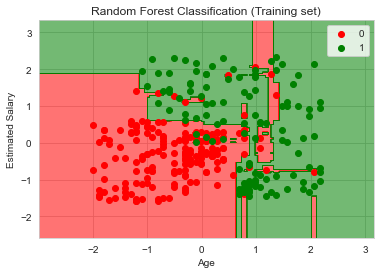

In [20]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.55, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


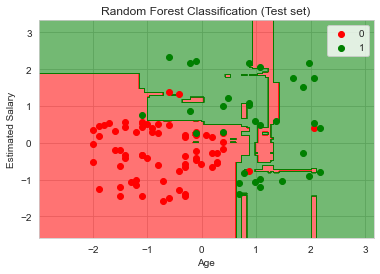

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.55, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()